<a href="https://colab.research.google.com/github/zhubzy/SF-Incident-Prediction/blob/main/SF_Incident_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# San Francisco Incident Prediction

## Research Question / Topic:
 **How can we predict the nature of a crime incident (violent or non-violet) based on the time of day (morning, afternoon, evening, night) and specific location (latitude and longitude coordinates) in San Francisco?**

## Downloading the San Francisco Incident Report Dataset

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [24]:
!wget -O Police_Department_Incident_Reports__2018_to_Present.csv 'https://drive.usercontent.google.com/download?id=1zeMUolmeJIKsL05RTSKOQ4QSS-lS0-WO&export=download&authuser=0&confirm=t&uuid=be261cfa-bbad-4ef4-ab27-19e263e41373&at=APZUnTVHDqDvxUJimYV3DAD_3UWF%3A1707720805000'

--2024-02-11 22:55:07--  https://drive.usercontent.google.com/download?id=1zeMUolmeJIKsL05RTSKOQ4QSS-lS0-WO&export=download&authuser=0&confirm=t&uuid=be261cfa-bbad-4ef4-ab27-19e263e41373&at=APZUnTVHDqDvxUJimYV3DAD_3UWF%3A1707720805000
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.189.1, 2607:f8b0:4007:817::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.189.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292150249 (279M) [application/octet-stream]
Saving to: ‘Police_Department_Incident_Reports__2018_to_Present.csv’

Police_Department_I 100%[===================>] 278.62M  13.0MB/s    in 21s     

2024-02-11 22:55:29 (13.1 MB/s) - ‘Police_Department_Incident_Reports__2018_to_Present.csv’ saved [292150249/292150249]



In [5]:
df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

## Data Cleaning and Pre-Processing

In [6]:
df.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District',
       'Supervisor District 2012', 'Latitude', 'Longitude', 'Point',
       'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts'],
      dtype='object')

In [7]:
df.size

27875960

First, we want to remove all rows where some data are missing for the columns we care about

In [10]:
columns_to_keep = ['Incident Datetime', 'Incident Category', 'Intersection', 'Latitude', 'Longitude']

In [16]:
df_cleaned = df.drop(columns=[col for col in df.columns if col not in columns_to_keep]).dropna(subset=columns_to_keep)

In [30]:
df['Incident Category'].unique()

array(['Recovered Vehicle', 'Larceny Theft', 'Assault', 'Lost Property',
       'Drug Violation', 'Malicious Mischief', 'Drug Offense',
       'Non-Criminal', 'Fraud', 'Warrant', 'Other Offenses', 'Robbery',
       'Case Closure', 'Other Miscellaneous', 'Stolen Property',
       'Offences Against The Family And Children', 'Other',
       'Motor Vehicle Theft', 'Traffic Collision', 'Suspicious Occ',
       'Missing Person', 'Disorderly Conduct', 'Weapons Carrying Etc',
       'Rape', 'Burglary', 'Fire Report', 'Arson', 'Vandalism', 'Suicide',
       'Traffic Violation Arrest', 'Courtesy Report',
       'Forgery And Counterfeiting', 'Sex Offense', 'Prostitution',
       'Weapons Offense', 'Miscellaneous Investigation',
       'Vehicle Misplaced', 'Embezzlement', 'Suspicious', nan,
       'Civil Sidewalks', 'Vehicle Impounded', 'Liquor Laws',
       'Human Trafficking, Commercial Sex Acts', 'Gambling', 'Homicide',
       'Motor Vehicle Theft?',
       'Human Trafficking (A), Commercial Se

In [32]:
violent_category = [
    'Assault',
    'Rape',
    'Robbery',
    'Arson',
    'Vandalism',
    'Homicide',
    'Weapons Carrying Etc',
    'Weapons Offense',
    'Weapons Offence',
    'Human Trafficking, Commercial Sex Acts',
    'Human Trafficking (A), Commercial Sex Acts',
    'Human Trafficking (B), Involuntary Servitude'
]

Categorize as violent or non-violent

In [33]:
## TODO: Label the incident based on some other attributes
df_cleaned['violent'] = df['Incident Category'].apply(lambda x: x in violent_category)

In [38]:
df_cleaned['Incident Datetime'] = pd.to_datetime(df_cleaned['Incident Datetime'])

/var/folders/86/2g06tbxs6fv8mq5lns71p45h0000gn/T/ipykernel_63278/3113993728.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])


In [39]:
df_cleaned

,Incident Datetime,Incident Category,Intersection,Latitude,Longitude,violent
9,2023-03-11 14:00:00,Assault,STANYAN ST \ HAYES ST,37.772895,-122.454285,True
11,2022-06-27 12:00:00,Lost Property,GEARY ST \ POWELL ST,37.787359,-122.408227,False
13,2023-03-16 17:30:00,Assault,18TH ST \ DE HARO ST,37.762290,-122.401324,True
33,2023-03-21 15:50:00,Non-Criminal,POST ST \ LARKIN ST,37.787038,-122.418271,False
61,2021-08-22 09:40:00,Warrant,LAGUNA ST \ PACIFIC AVE,37.793977,-122.429804,False
...,...,...,...,...,...,...
796451,2023-03-22 13:30:00,Robbery,24TH ST \ POTRERO AVE,37.753004,-122.406336,True
796452,2023-03-22 00:13:00,Larceny Theft,SACRAMENTO ST \ DIVISADERO ST,37.788995,-122.440624,False
796453,2023-03-21 21:19:00,Non-Criminal,MISSION ST \ ACTON ST \ SICKLES AVE,37.708806,-122.452665,False
796454,2023-03-22 15:28:00,Larceny Theft,BUSH ST \ GRANT AVE,37.790565,-122.405574,False


In [42]:
df_cleaned['Hour'] = df_cleaned['Incident Datetime'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['Incident Datetime'].dt.dayofweek
df_cleaned['Month'] = df_cleaned['Incident Datetime'].dt.month

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
df_cleaned['Latitude'] = scaler.fit_transform(df_cleaned['Latitude'].values.reshape(-1,1))
df_cleaned['Longitude'] = scaler.fit_transform(df_cleaned['Longitude'].values.reshape(-1,1))
df_cleaned['Hour'] = scaler.fit_transform(df_cleaned['Hour'].values.reshape(-1,1))
df_cleaned['DayOfWeek'] = scaler.fit_transform(df_cleaned['DayOfWeek'].values.reshape(-1,1))
df_cleaned['Month'] = scaler.fit_transform(df_cleaned['Month'].values.reshape(-1,1))

In [120]:
df_cleaned

,Incident Datetime,Incident Category,Intersection,Latitude,Longitude,violent,Hour,DayOfWeek,Month
9,2023-03-11 14:00:00,Assault,STANYAN ST \ HAYES ST,0.155051,-1.146618,True,0.160874,1.028259,-1.017516
11,2022-06-27 12:00:00,Lost Property,GEARY ST \ POWELL ST,0.744722,0.598197,False,-0.149052,-1.508598,-0.135458
13,2023-03-16 17:30:00,Assault,18TH ST \ DE HARO ST,-0.277301,0.859684,True,0.625762,0.013516,-1.017516
33,2023-03-21 15:50:00,Non-Criminal,POST ST \ LARKIN ST,0.731622,0.217694,False,0.315836,-1.001226,-1.017516
61,2021-08-22 09:40:00,Warrant,LAGUNA ST \ PACIFIC AVE,1.014523,-0.219207,False,-0.613940,1.535630,0.452581
...,...,...,...,...,...,...,...,...,...
796451,2023-03-22 13:30:00,Robbery,24TH ST \ POTRERO AVE,-0.655869,0.669814,True,0.005911,-0.493855,-1.017516
796452,2023-03-22 00:13:00,Larceny Theft,SACRAMENTO ST \ DIVISADERO ST,0.811418,-0.629084,False,-2.008604,-0.493855,-1.017516
796453,2023-03-21 21:19:00,Non-Criminal,MISSION ST \ ACTON ST \ SICKLES AVE,-2.457716,-1.085233,False,1.245612,-1.001226,-1.017516
796454,2023-03-22 15:28:00,Larceny Theft,BUSH ST \ GRANT AVE,0.875422,0.698699,False,0.315836,-0.493855,-1.017516


In [122]:
balanced_df

,Incident Datetime,Incident Category,Intersection,Latitude,Longitude,violent,Hour,DayOfWeek,Month
306057,2022-12-24 09:36:00,Robbery,LARKIN ST \ HAYES ST,0.351861,0.288531,True,-0.613940,1.028259,1.628659
532910,2019-05-01 11:48:00,Robbery,DIVISADERO ST \ OFARRELL ST,0.544601,-0.578852,True,-0.304014,-0.493855,-0.429477
42205,2023-05-30 02:35:00,Assault,STEVENSON ST \ 07TH ST \ ODD FELLOWS WAY,0.444939,0.457778,True,-1.698678,-1.001226,-0.429477
519316,2018-08-23 01:30:00,Robbery,OLIVE ST \ LARKIN ST,0.636709,0.235315,True,-1.853641,0.013516,0.452581
217330,2022-11-13 21:30:00,Robbery,BROADWAY \ DIRK DIRKSEN PL,1.183351,0.732559,True,1.245612,1.535630,1.334640
...,...,...,...,...,...,...,...,...,...
462968,2018-09-10 20:14:00,Disorderly Conduct,MISSION ST \ 07TH ST,0.412562,0.495541,False,1.090650,-1.508598,0.746601
721235,2020-10-29 09:55:00,Offences Against The Family And Children,OCTAVIA ST \ LOMBARD ST,1.287715,-0.206588,False,-0.613940,0.013516,1.040620
601622,2019-08-05 22:12:00,Burglary,FALMOUTH ST \ SHIPLEY ST,0.404137,0.762737,False,1.400575,-1.508598,0.452581
775589,2021-05-19 14:50:00,Larceny Theft,FRANKLIN ST \ LARCH ST,0.535174,0.062431,False,0.160874,-0.493855,-0.429477


As visualized by the scatter plots, it is hard to separate the two classes (violent vs non-violent) just by using linear model. There needs to be either additional features

## Incident Datetime Data Exploration

In [17]:
df['Incident Datetime'].values

array(['2023/03/13 11:41:00 PM', '2023/03/01 05:02:00 AM',
       '2023/03/13 01:16:00 PM', ..., '2023/03/21 09:19:00 PM',
       '2023/03/22 03:28:00 PM', '2023/03/21 05:42:00 PM'], dtype=object)

/var/folders/86/2g06tbxs6fv8mq5lns71p45h0000gn/T/ipykernel_47821/3598357430.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])


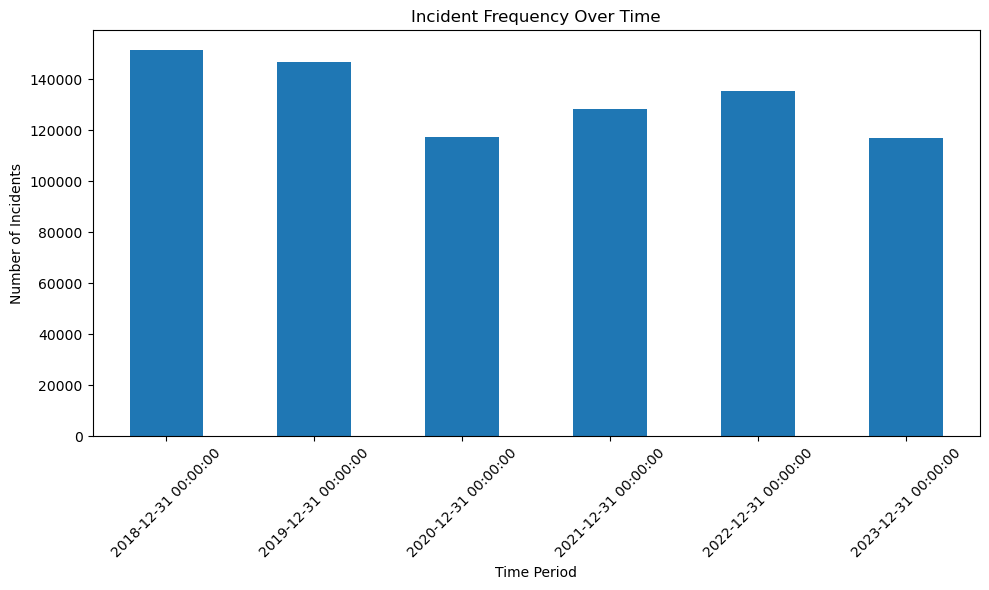

In [19]:
df['Incident Datetime'] = pd.to_datetime(df['Incident Datetime'])

df.set_index('Incident Datetime', inplace=True)


incident_frequency = df.resample('Y').size() 

plt.figure(figsize=(10, 6)) 
incident_frequency.plot(kind='bar') 
plt.title('Incident Frequency Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

From this graph, we can tell that the number of incidents of recent years has seen a significant decrease. Even though the decrease in 2020 can be explained with covid, the low number of incidents in 2023 is still a positive sign.

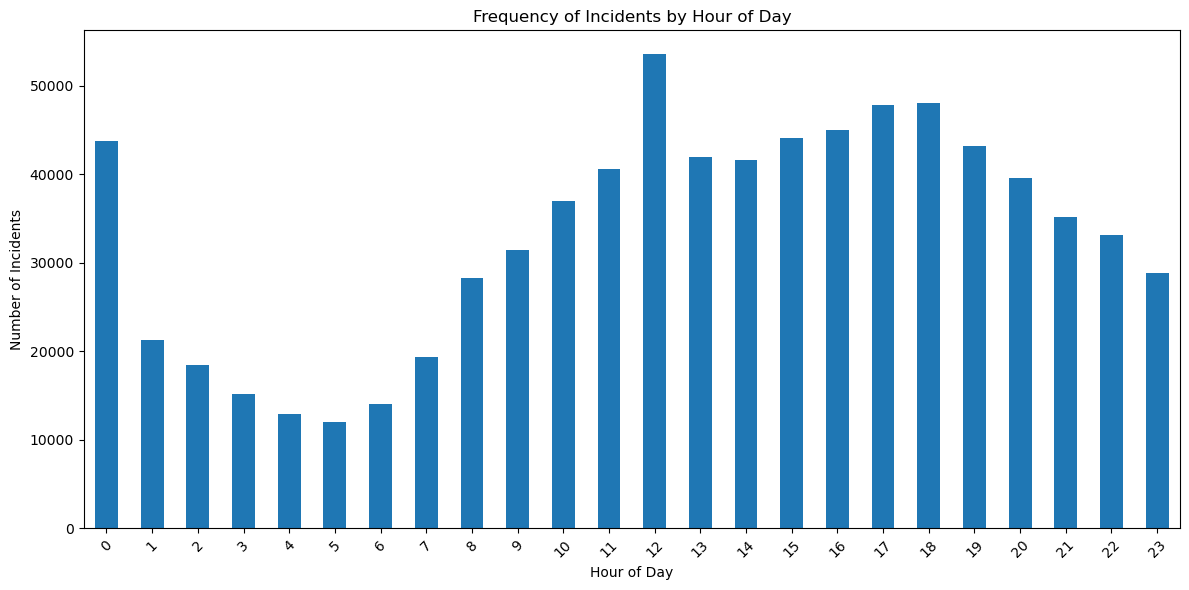

In [20]:
df['Hour of the day'] = df.index.hour
hourly_frequency = df.groupby('Hour of the day').size()

plt.figure(figsize=(12, 6))
hourly_frequency.plot(kind='bar')
plt.title('Frequency of Incidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this graph, we see that the incident rate sees its peak at noon and afternoon. Besides, 1am to 7 pm are generally the safest hours.

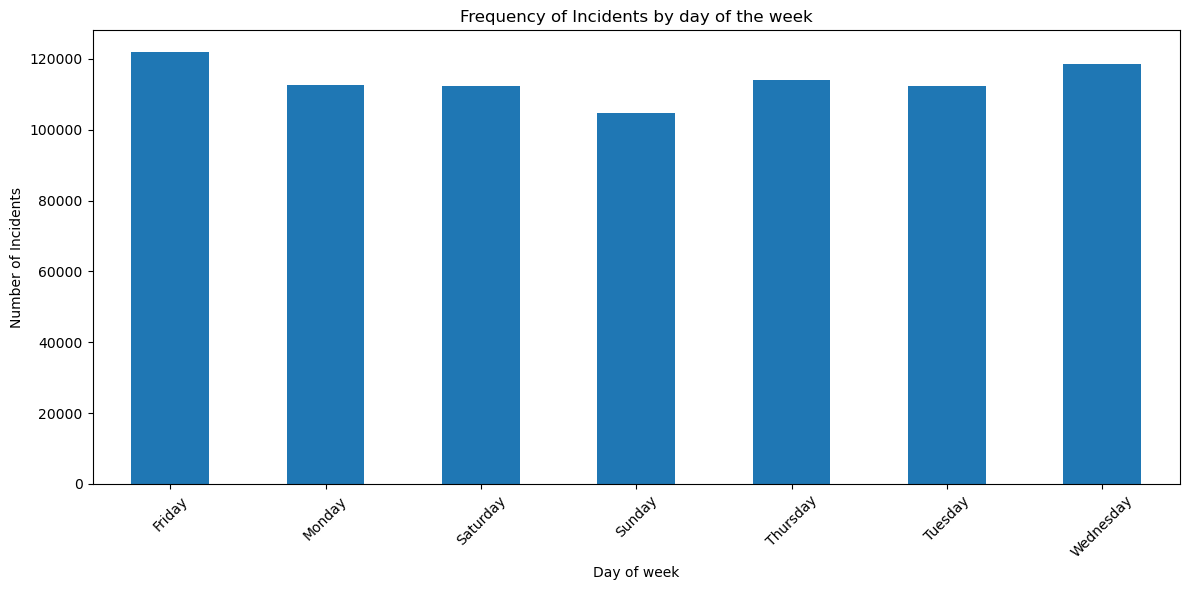

In [21]:
day_of_week_counts = df['Incident Day of Week'].value_counts().sort_index()
day_of_week_counts

plt.figure(figsize=(12, 6))
day_of_week_counts.plot(kind='bar')
plt.title('Frequency of Incidents by day of the week')
plt.xlabel('Day of week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here, we see the friday has the most incidents and sunday has the least. However, all days are more or less close to each other.

## Incident Location Data Exploration

In this code section below, we generated two types of data visualizations for exploring incident location data from San Francisco police reports, utilizing Plotly Express for interactive and detailed insights. With the use of Scatter Geo Plot, this map visualization focuses on the first 10,000 cleaned incidents, displaying them by latitude and longitude with different colors representing various incident categories. The map is centered on San Francisco, with specific geographic adjustments for a clear visualization of the area.

In [ ]:
fig = px.scatter_geo(df_cleaned[:10000],
                     lat='Latitude',
                     lon='Longitude',
                     color='Incident Category', # Differentiate points by Incident Category
                     hover_name='Incident Description', # Display Incident Description on hover
                     hover_data=['Resolution', 'Police District', 'Analysis Neighborhood'], # Additional data to show on hover
                     title='Incidents by Category and Location',
                     projection='natural earth') # Use a natural earth projection for the globe

fig.update_geos(
    visible=False, # Hide the default basemap for a cleaner look
    showcountries=True, countrycolor="RebeccaPurple",
    showsubunits=True, subunitcolor="Blue",
    center={"lat": 37.7749, "lon": -122.4194}, # Center the map on San Francisco
    lataxis_range=[37.70, 37.82], # Latitude range for San Francisco
    lonaxis_range=[-122.53, -122.36] # Longitude range for San Francisco
)

fig.update_layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'),
                  paper_bgcolor='rgba(0,0,0,0)',
                  geo_landcolor='lightgrey')

fig.show()

![Location chart1](location1.png)


The code section below explores and visualizes the incident location data using histogram. This chart displays the count of incident types across different analysis neighborhoods in San Francisco, grouped by incident category. It is designed to offer a comparative view of incident frequencies in neighborhoods, with the neighborhoods ordered by the total number of incidents descending. This visualization is useful for identifying areas with higher incident rates and the commonality of incident types in each neighborhood. Notably, the 'Financial District/South Beach' neighborhood stands out with the highest count of incidents, particularly for 'Larceny Theft', which appears to be the most common incident category across almost all neighborhoods.

In summary, these two kinds of visualizations provide a comprehensive tool for analyzing spatial and categorical patterns in incident police reports for San Francisco, which could better help us understand the crime dynamics and analysis of incident types within the area of San Francisco.

In [ ]:
fig = px.histogram(df, x='Analysis Neighborhood', color='Incident Category',
                   barmode='group',
                   height=600,
                   title='Count of Incident Types per Analysis Neighborhood')
fig.update_layout(xaxis={'categoryorder':'total descending'},
                  xaxis_title="Analysis Neighborhood",
                  yaxis_title="Count of Incidents",
                  legend_title="Incident Category",
                  autosize=True)
fig.update_xaxes(tickangle=-45)
fig.show()

![Location chart2](location2.png)

## Incident Category Data Exploration

In [13]:
df['Incident Category'].describe()

count            795743
unique               49
top       Larceny Theft
freq             242034
Name: Incident Category, dtype: object

In [14]:
category_counts = df_cleaned['Incident Category'].value_counts()
category_counts

Incident Category
Larceny Theft                                   219521
Other Miscellaneous                              54071
Malicious Mischief                               51577
Assault                                          48376
Non-Criminal                                     46198
Burglary                                         43945
Motor Vehicle Theft                              42030
Fraud                                            25376
Recovered Vehicle                                22913
Warrant                                          22311
Drug Offense                                     19382
Lost Property                                    18625
Robbery                                          17782
Missing Person                                   17149
Suspicious Occ                                   16303
Disorderly Conduct                               13292
Offences Against The Family And Children         10542
Miscellaneous Investigation                    

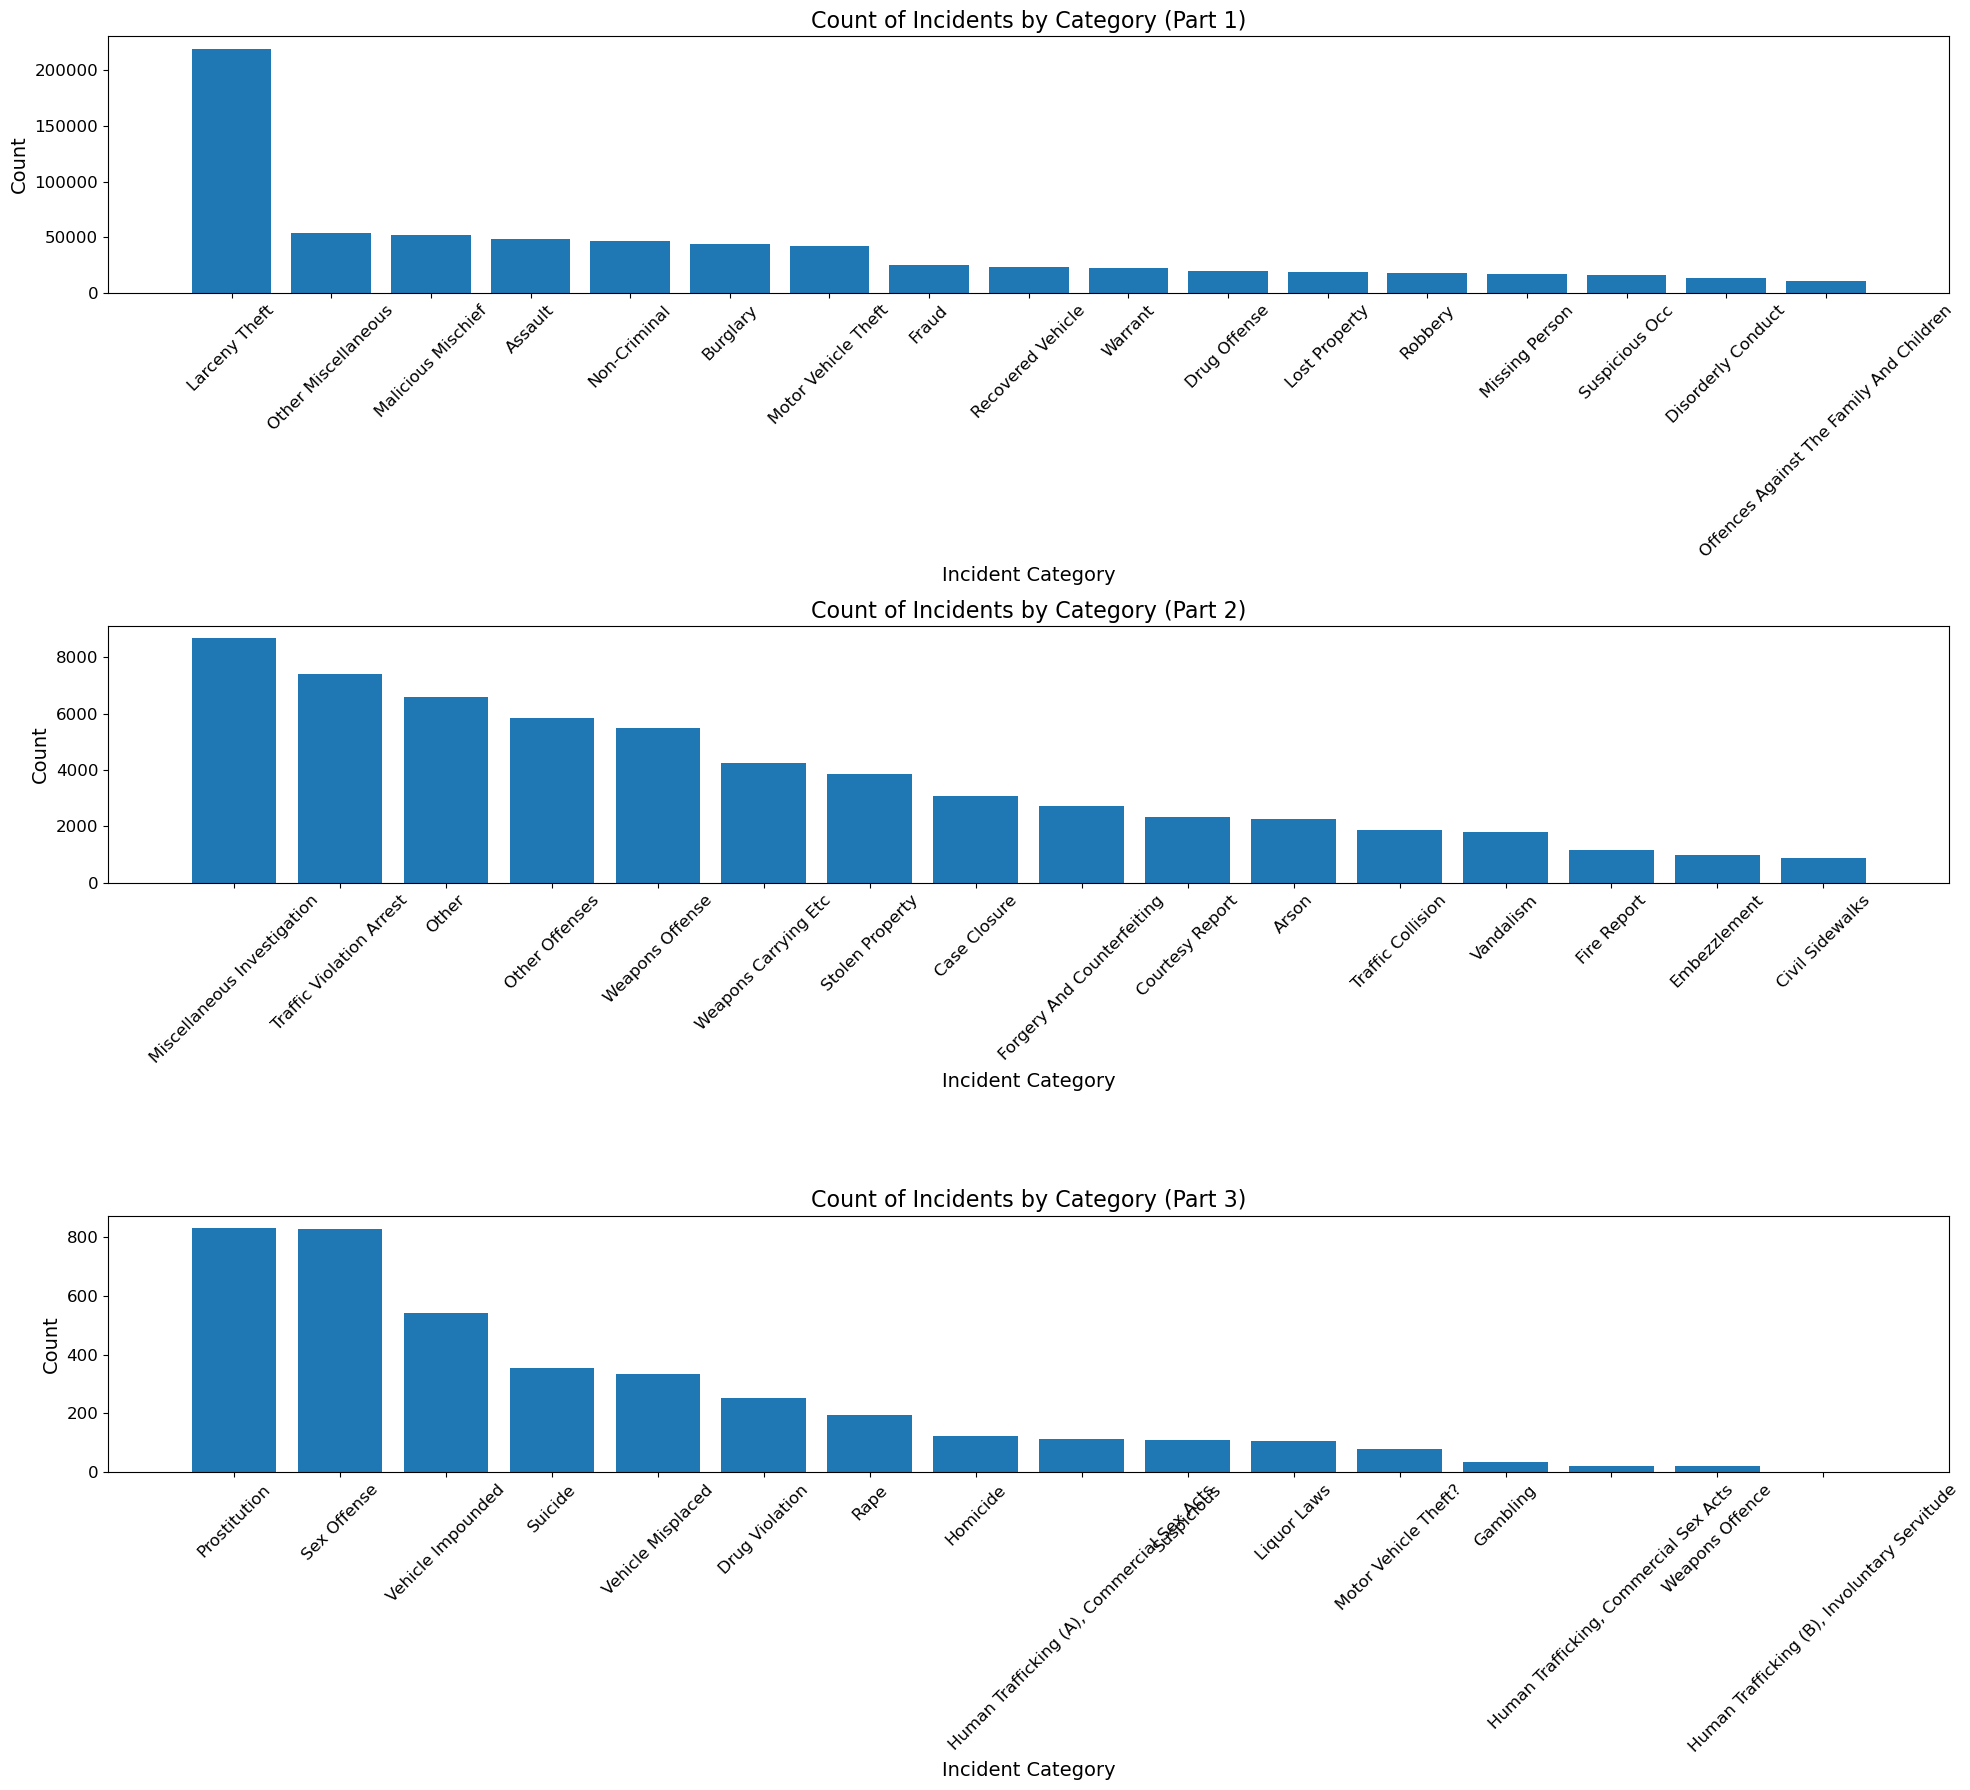

In [15]:
thirds = np.array_split(category_counts, 3)

fig, axs = plt.subplots(3, 1, figsize=(20, 18))

for i, third in enumerate(thirds):
    axs[i].bar(third.index, third.values)
    axs[i].set_title('Count of Incidents by Category (Part {})'.format(i+1), fontsize=16)
    axs[i].set_xlabel('Incident Category', fontsize=14)
    axs[i].set_ylabel('Count', fontsize=14)
    axs[i].tick_params(axis='x', rotation=45, labelsize=12)
    axs[i].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

This is a histogram showing the counts of all the incident categories in the dataset. The number of categories is too large and the comparisons between some low-count incident categories are too trivial so that I split it into 3 parts, each containing 1/3 of all the categories of incidents.

As we can see in the histogram, latency theft is the most freqent kind of crime that happend in San Francisco, playing a dominant role in all categories of incidents.

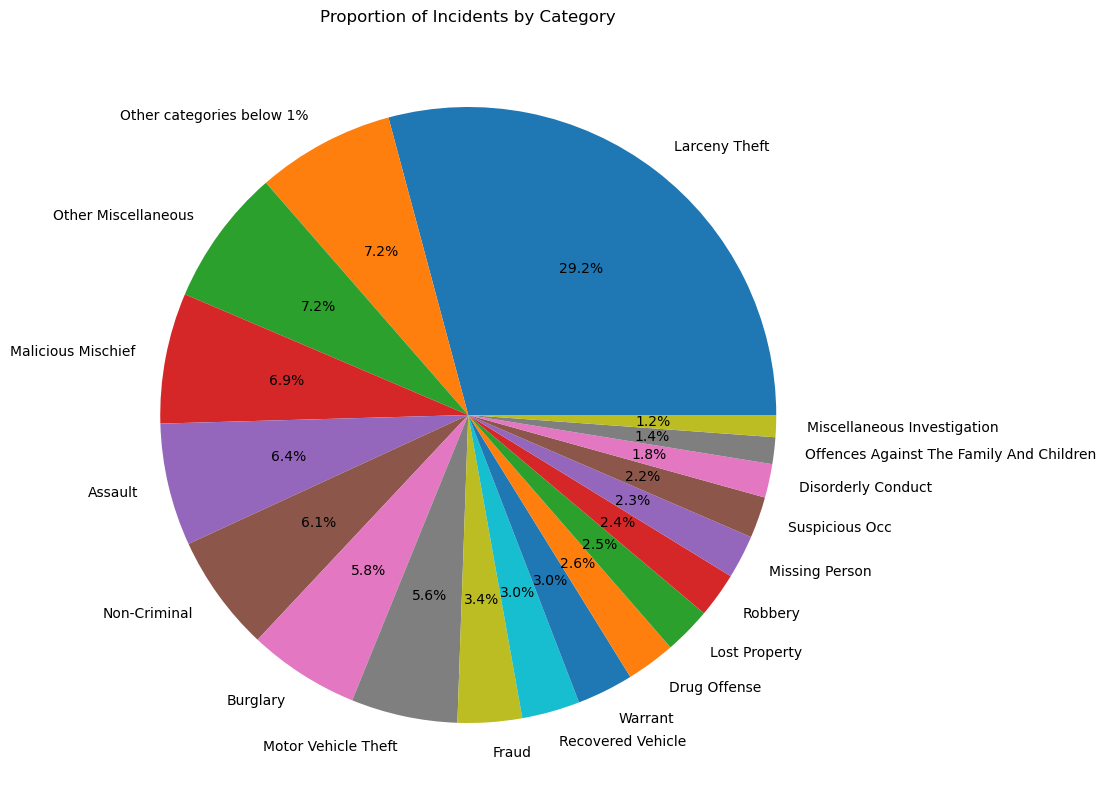

In [16]:
category_percents = df_cleaned['Incident Category'].value_counts(normalize=True) * 100

category_counts_modified = df_cleaned['Incident Category'].apply(lambda x: 'Other categories below 1%' if category_percents[x] < 1 else x)

category_counts_modified = category_counts_modified.value_counts()

plt.figure(figsize=(10, 10), facecolor='white')
plt.pie(category_counts_modified, labels=category_counts_modified.index, autopct='%1.1f%%')
plt.title('Proportion of Incidents by Category')
plt.show()

This is a pie chart showing the proportions of all the incident categories. In order to make the graph look nicer, I combined all the categories with proportion below 1% together to be a new category called "Other categories below 1%".

As we can see from the pie chart, latency theft takes about 30% of all the incidents happened in San Francisco. We can also tell from the graphs that the categories are really diverse since the proportions of the categories except for latency theft are relatively close to each other and the combined proportion of all categories with their individual proportion less than 1% is 7.2%, which is the second largest proportion on the pie chart.

In [165]:

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
def LogisticRegressionTest(X_train, Y_train, X_test, Y_test):
    # Initialize the Logistic Regression model
    log_reg = LogisticRegression()
    # Fit the model to the training data
    log_reg.fit(X_train, Y_train)
    # Predict on the test data
    y_pred = log_reg.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(Y_test, y_pred)
    print(f'Accuracy of the logistic regression model: {accuracy:.2f}')

In [166]:
y = df_cleaned['violent']
X_train, X_test, Y_train, Y_test = train_test_split(df_cleaned[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']], y, test_size=0.1, random_state=42, stratify=y)
LogisticRegressionTest(X_train, Y_train, X_test, Y_test)

Accuracy of the logistic regression model: 0.89


We immediately get a very high accuracy in the model with class imbalance (since most crimes are not violent in nature, thus the modal will always predict 0 in all cases). To continue with the experiment, we try to create a balance dataset with equal distributions of crime data.

In [167]:
violent_df = df_cleaned[df_cleaned['violent'] == True]
nonviolent_df = df_cleaned[df_cleaned['violent'] == False]
min_size = min(len(violent_df), len(nonviolent_df))
balanced_violent_df = violent_df.sample(n=min_size, random_state=1)
balanced_nonviolent_df = nonviolent_df.sample(n=min_size, random_state=1)
balanced_df = pd.concat([balanced_violent_df, balanced_nonviolent_df])


In [168]:
from sklearn.model_selection import train_test_split
y = balanced_df['violent']
X_train, X_test, Y_train, Y_test = train_test_split(balanced_df[['Latitude', 'Longitude', 'Hour', 'DayOfWeek', 'Month']], y, test_size=0.1, random_state=42, stratify=y)
balanced_df['violent'] = balanced_df['violent'].astype(int)
LogisticRegressionTest(X_train, Y_train, X_test, Y_test)

Accuracy of the logistic regression model: 0.56


The accuracy in this case is very low with the initial logistic regression modal, indicating that the data is hard to dataset is not linearly separable. Plotting the relationship between the normalized longitude latitude vs crime type confirms this, as there doesn't seem to a clear linear relationship with regards to location data. More feature enginerring is probably needed (such as one hot encoding the community instead).

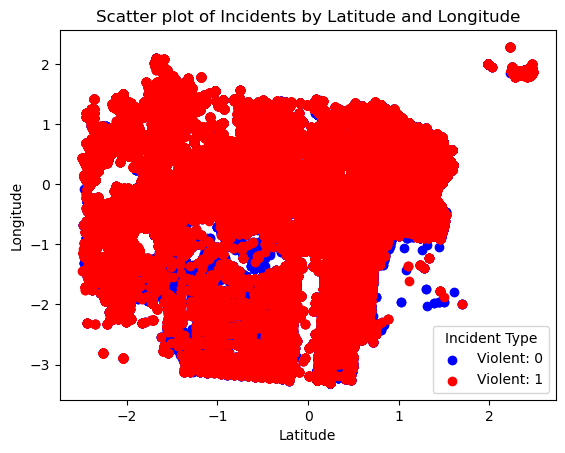

In [158]:
# Plotting
fig, ax = plt.subplots()
# Plotting points with different colors for violent and non-violent incidents
for label, df in balanced_df.groupby('violent'):
    color = 'red' if label else 'blue'
    ax.scatter(df['Latitude'], df['Longitude'], c=color, label=f"Violent: {label}")

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.legend(title='Incident Type')
ax.set_title('Scatter plot of Incidents by Latitude and Longitude')
plt.show()